In [23]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [24]:
# load data
train = pd.read_csv('train.csv')
train.head(3)

,event_date,year,Event type,Actor1,Actor2,County,Area1,Area2,Area3,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
0,25/12/2018,2018.0,Battle-No change of territory,Al Shabaab,Police Forces of Kenya (2013-),Mandera,Mandera East,Township,Mandera,3.9357,41.8542,1.0,BBC Monitoring; Somali Memo,Regional-International,25 December: Al Shabaab claimed to have killed...,2
1,25/09/2018,2018.0,Battle-No change of territory,Al Shabaab,Military Forces of Kenya (2013-),NaN,NaN,Kiunga,Kiwayu,-2.0124,41.2698,3.0,Radio Andalus,Regional,25 September 2018: Al-Shabaab forces reportedl...,1
2,25/09/2018,2018.0,Battle-No change of territory,Al Shabaab,Military Forces of Kenya (2013-),Lamu,Lamu West,Shella,Lamu,-2.2717,40.9020,2.0,BBC Monitoring; Radio Andalus,International,"On September 25th, a pro-Al Shabaab radio stat...",13


In [25]:
# missing values
train.isnull().sum()

event_date        1
year              1
Event type        1
Actor1            1
Actor2           32
County           13
Area1            13
Area2             1
Area3             1
latitude          3
longitude         3
geo_precision     3
source            1
source_scale      1
notes             1
fatalities        0
dtype: int64

In [26]:
# rename a column
train.rename(columns={"Event type": "Event_type"}, inplace=True)

In [27]:
train.head(2)

,event_date,year,Event_type,Actor1,Actor2,County,Area1,Area2,Area3,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
0,25/12/2018,2018.0,Battle-No change of territory,Al Shabaab,Police Forces of Kenya (2013-),Mandera,Mandera East,Township,Mandera,3.9357,41.8542,1.0,BBC Monitoring; Somali Memo,Regional-International,25 December: Al Shabaab claimed to have killed...,2
1,25/09/2018,2018.0,Battle-No change of territory,Al Shabaab,Military Forces of Kenya (2013-),NaN,NaN,Kiunga,Kiwayu,-2.0124,41.2698,3.0,Radio Andalus,Regional,25 September 2018: Al-Shabaab forces reportedl...,1


# Exploratory Data Analysis

In [28]:
print('County with Highest Terrorist Attacks:',train['County'].value_counts().index[0])
print('Region1 with Highest Terrorist Attacks:',train['Area1'].value_counts().index[0])
print('Region2 with Highest Terrorist Attacks:',train['Area2'].value_counts().index[0])
print('Region3 with Highest Terrorist Attacks:',train['Area3'].value_counts().index[0])
print('Maximum people killed in an attack are:',train['fatalities'].max(),'that took place in',train.loc[train['fatalities'].idxmax()].County)

County with Highest Terrorist Attacks: Mandera
Region1 with Highest Terrorist Attacks: Mandera East
Region2 with Highest Terrorist Attacks: Township
Region3 with Highest Terrorist Attacks: Mandera
Maximum people killed in an attack are: 1411 that took place in nan


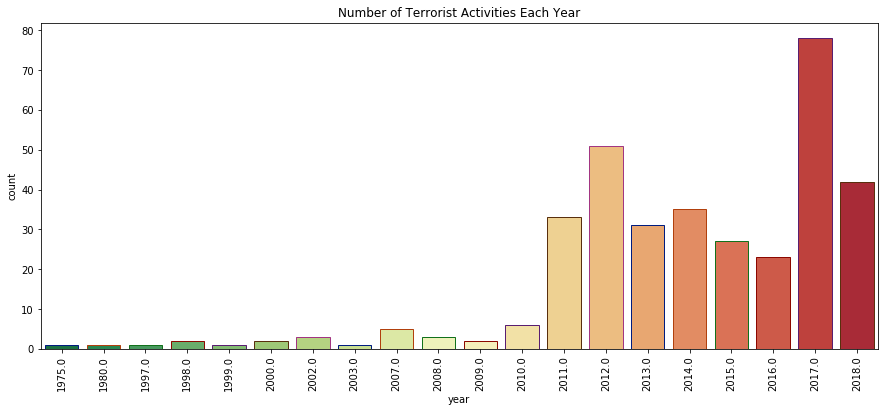

In [29]:
# Terror attacks over the years
plt.subplots(figsize=(15,6))
sns.countplot('year',data=train,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

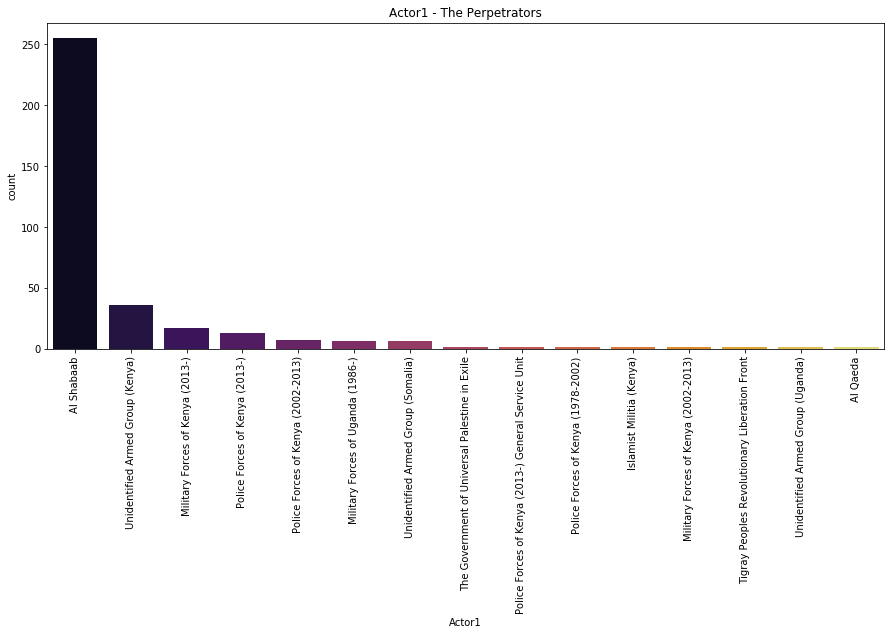

In [30]:
# the perpetrators of terror attacks (ACTOR1)
plt.subplots(figsize=(15,6))
sns.countplot('Actor1',data=train,palette='inferno',order=train['Actor1'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Actor1 - The Perpetrators')
plt.show()

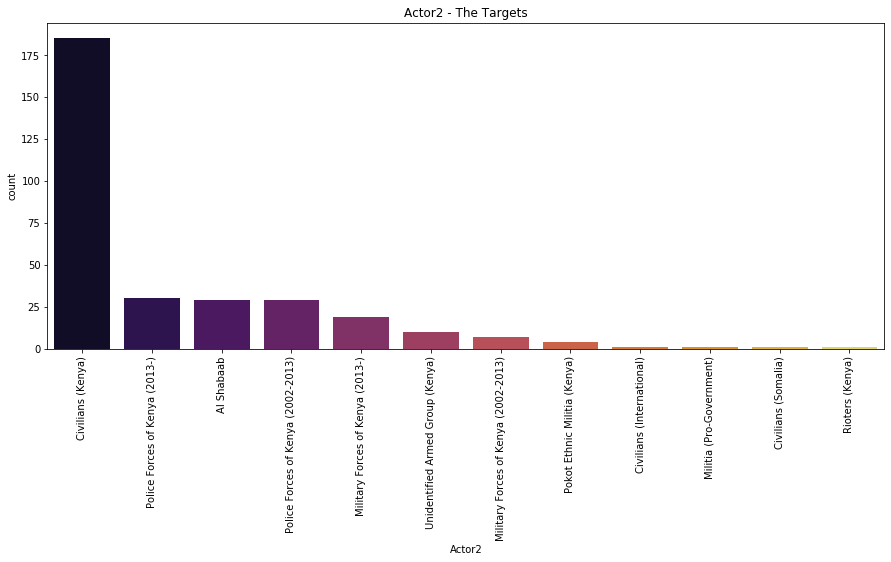

In [31]:
# the casualities of terror attacks (Actor2)
plt.subplots(figsize=(15,6))
sns.countplot('Actor2', data=train,palette='inferno',order=train['Actor2'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Actor2 - The Targets')
plt.show()

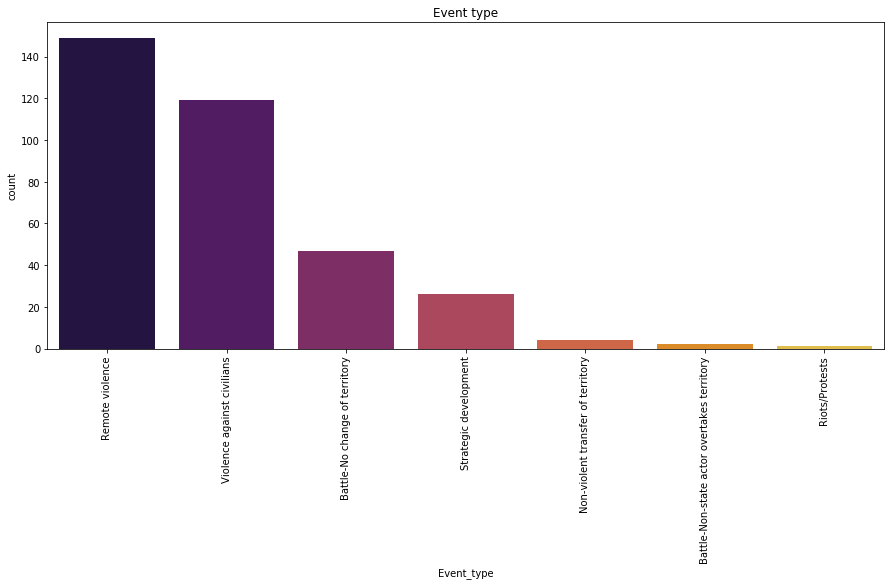

In [32]:
# the Event type
plt.subplots(figsize=(15,6))
sns.countplot(train['Event_type'],palette='inferno',order=train['Event_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Event type')
plt.show()

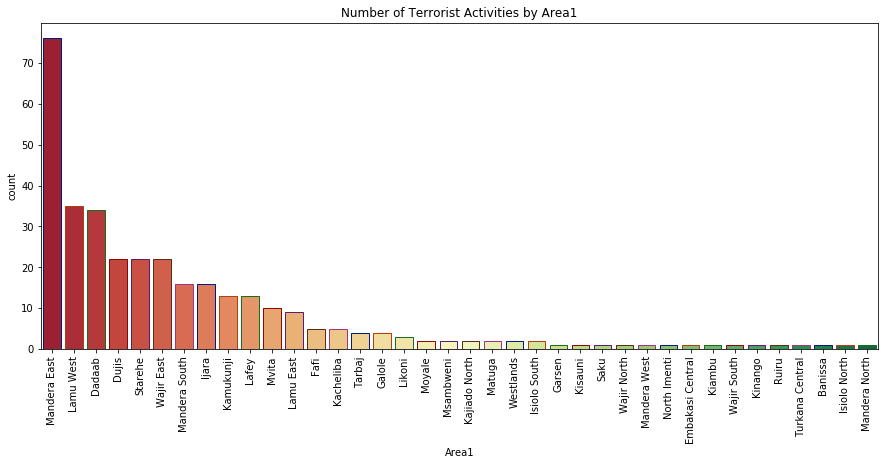

In [33]:
# terrorist attacks by Area1
plt.subplots(figsize=(15,6))
sns.countplot('Area1',data=train,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=train['Area1'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities by Area1')
plt.show()

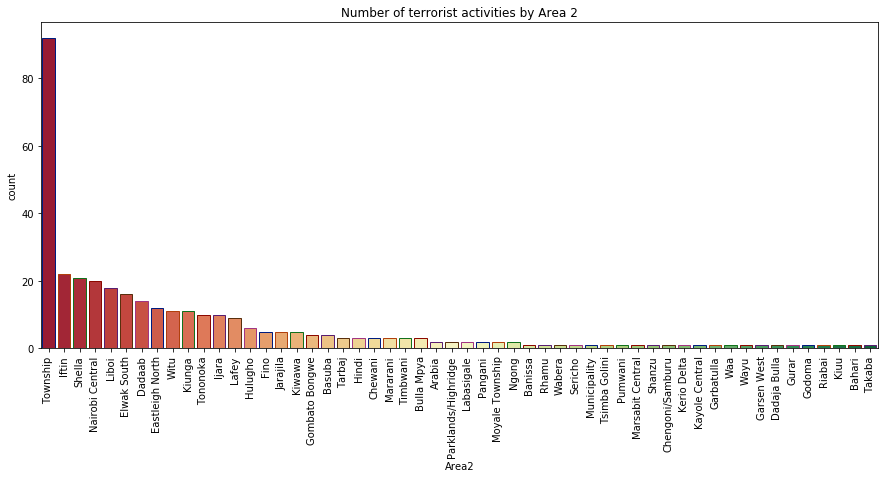

In [34]:
# terrorist attacks by Area2
plt.subplots(figsize=(15,6))
sns.countplot('Area2',data=train,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=train['Area2'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of terrorist activities by Area 2')
plt.show()

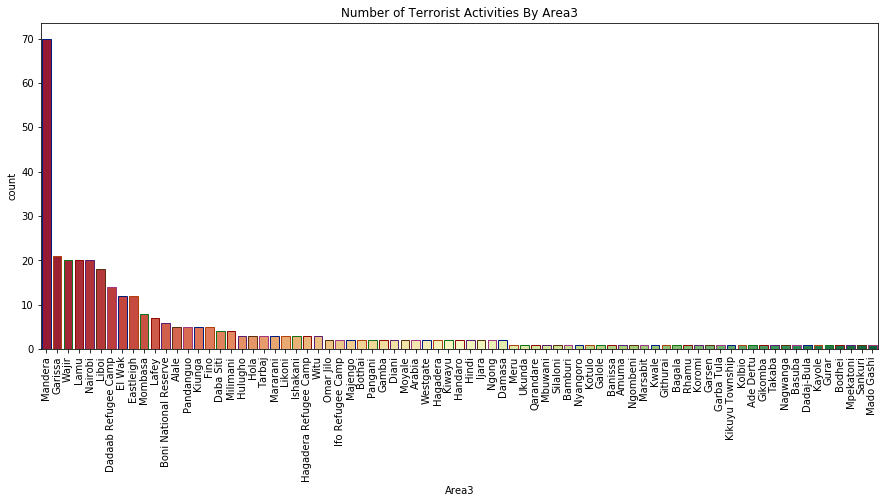

In [35]:
# # terrorist attacks by Area3
plt.subplots(figsize=(15,6))
sns.countplot('Area3', data=train,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=train['Area3'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities By Area3')
plt.show()

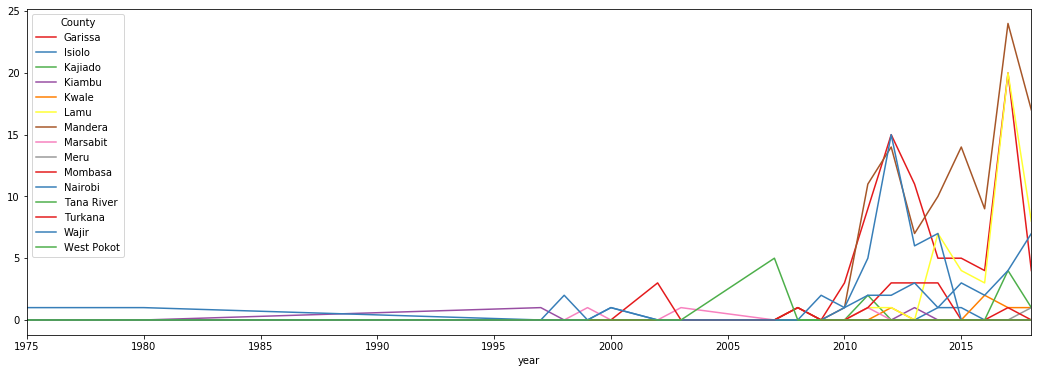

In [36]:
# trend in terror activites
train_county = pd.crosstab(train.year,train.County)
train_county.plot(color=sns.color_palette('Set1',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()

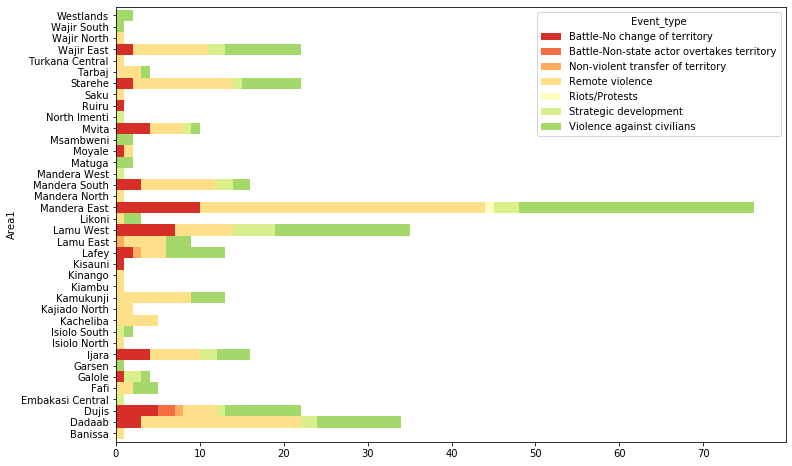

In [37]:
# Attack Type vs Region
pd.crosstab(train.Area1,train['Event_type']).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

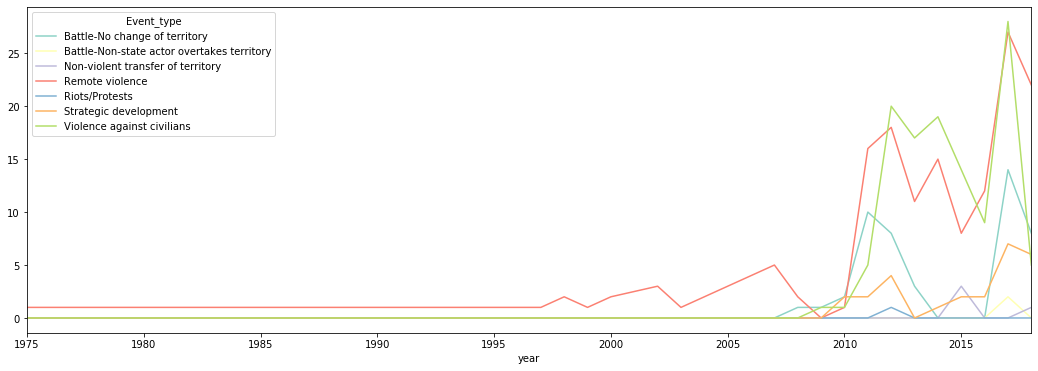

In [38]:
# trend in terror activites
train_Event_type = pd.crosstab(train.year,train.Event_type)
train_Event_type.plot(color=sns.color_palette('Set3',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.show()